# Importing Data & Reviewing Dataset 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', index_col=0)

In [3]:
df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
readmitted_df = df.groupby(['gender', 'readmitted'])['patient_nbr'].count().reset_index()

# Cleaning Step. Needeed to rename the data during cleaning step to better reflect the the Race information

In [7]:
df_cleaned = df.replace({'?': np.nan}, inplace=True)

In [8]:
df.groupby(['race', 'readmitted'])['patient_nbr'].count().reset_index()

,race,readmitted,patient_nbr
0,AfricanAmerican,<30,2155
1,AfricanAmerican,>30,6634
2,AfricanAmerican,NO,10421
3,Asian,<30,65
4,Asian,>30,161
5,Asian,NO,415
6,Caucasian,<30,8592
7,Caucasian,>30,27124
8,Caucasian,NO,40383
9,Hispanic,<30,212


# Creating a group by and comparing data using bar graph to show disparity

      Readmission  African American  Asian  Caucasian  Hispanic
0   Readmitted<30              2155     65       8592       212
1   Readmitted>30              6634    161      27124       642
2  No Readmission             10421    415      40383      1183


<Axes: title={'center': 'Readmission'}, xlabel='Readmission'>

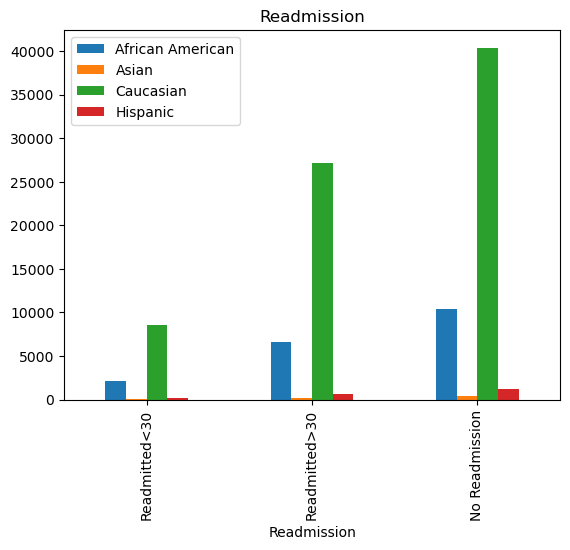

In [41]:
  # create data 
df = pd.DataFrame([['Readmitted<30', 2155, 65, 8592, 212], ['Readmitted>30', 6634, 161, 27124, 642], ['No Readmission', 10421, 415, 40383, 1183]],  
                  columns=['Readmission', 'African American', 'Asian', 'Caucasian', 'Hispanic']) 
# view data 
print(df) 
  
# plot grouped bar chart 
df.plot(x='Readmission', 
        kind='bar', 
        stacked=False, 
        title='Readmission') 

# Summary: Based on data caucasians are heavily represented. All races have more readmissions after 30 days, and all show a similar trend by race and readmission category. Looks like by race, the readmission rates are largely equal. Additionally, the "Other" category that is depicted above in the table but not in the graph. It  was not graphed because it isn't informative we don't know why the "Other" was selected or inclusive of. However, the volumes of "Other" are higher than the Asian category and almost equal to that of hispanics in the data. 